In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
%matplotlib inline

In [10]:
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [14]:
print ('Train shape', df.shape)
print ('Test Shape', df_test.shape)

Train shape (1460, 81)
Test Shape (1459, 80)


In [18]:
df.isnull().sum(axis=0).sort_values().tail(15)

BsmtCond          37
BsmtFinType1      37
BsmtFinType2      38
BsmtExposure      38
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
GarageCond        81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [19]:
df_test.isnull().sum(axis=0).sort_values().tail(15)

BsmtFinType1      42
BsmtExposure      44
BsmtQual          44
BsmtCond          45
GarageType        76
GarageFinish      78
GarageYrBlt       78
GarageQual        78
GarageCond        78
LotFrontage      227
FireplaceQu      730
Fence           1169
Alley           1352
MiscFeature     1408
PoolQC          1456
dtype: int64

In [20]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
feast_counts=df.nunique(dropna=False)

In [28]:
feast_counts.sort_values()

CentralAir          2
Street              2
Utilities           2
PavedDrive          3
Alley               3
BsmtHalfBath        3
HalfBath            3
LandSlope           3
KitchenAbvGr        4
PoolQC              4
BsmtFullBath        4
FullBath            4
ExterQual           4
KitchenQual         4
LandContour         4
LotShape            4
Fireplaces          4
GarageFinish        4
MiscFeature         5
YrSold              5
GarageCars          5
BsmtExposure        5
BsmtCond            5
BsmtQual            5
ExterCond           5
HeatingQC           5
Fence               5
MasVnrType          5
LotConfig           5
MSZoning            5
                 ... 
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
MSSubClass         15
Exterior1st        15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        98
LotFrontage       111
YearBuilt 

C:\Users\tibre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


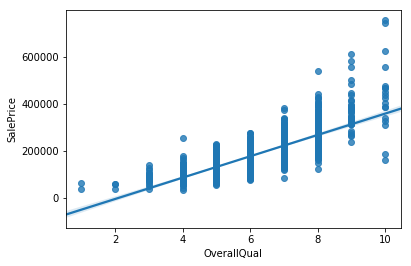

In [30]:
sns.regplot(x="OverallQual",y="SalePrice",data=df)

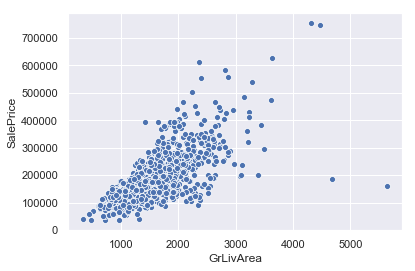

In [37]:
sns.set(style="darkgrid")
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df)

In [44]:
df=df.drop(df[(df['GrLivArea']>4000)&(df['SalePrice']<300000)].index)

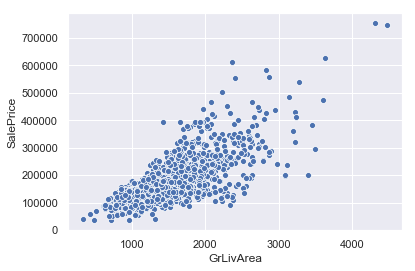

In [45]:
sns.set(style="darkgrid")
sns.scatterplot(x="GrLivArea",y="SalePrice",data=df)

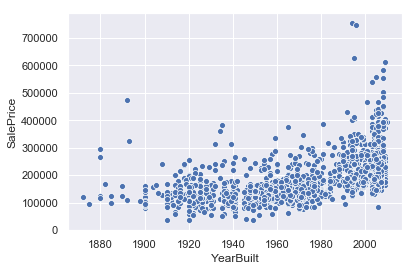

In [46]:
sns.set(style="darkgrid")
sns.scatterplot(x="YearBuilt",y="SalePrice",data=df)

C:\Users\tibre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


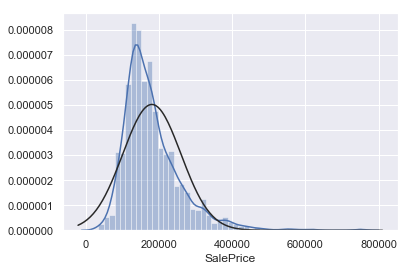

In [50]:
sns.distplot(df['SalePrice'],fit=norm)

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74213.25959976624, 180932.91906721535, 0.9320154492892367))

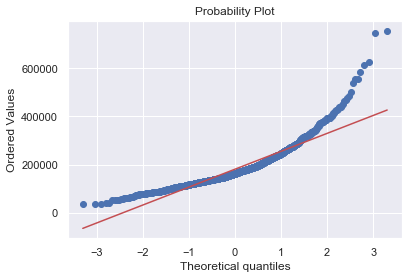

In [52]:
(mu,sigma)=norm.fit(df['SalePrice'])
stats.probplot(df['SalePrice'],plot=plt)

In [53]:
df['SalePrice']=np.log1p(df['SalePrice'])

((array([-3.3047554 , -3.04752042, -2.90446807, ...,  2.90446807,
          3.04752042,  3.3047554 ]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.3985294832980731, 12.024015155682548, 0.9953918721417084))

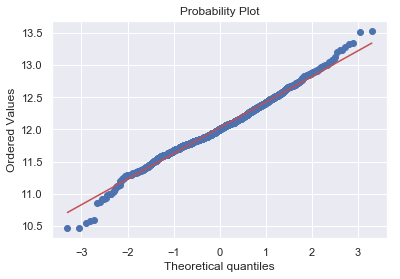

In [54]:
stats.probplot(df['SalePrice'],plot=plt)

C:\Users\tibre\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


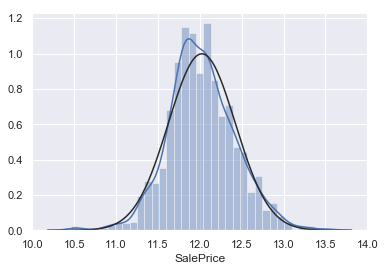

In [55]:
sns.distplot(df['SalePrice'],fit=norm)

In [57]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

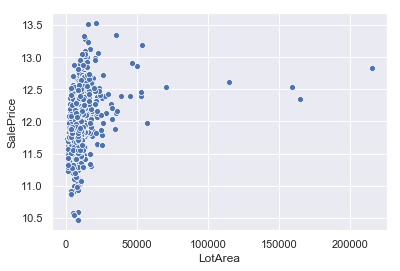

In [61]:
sns.scatterplot(y="SalePrice",x="LotArea",data=df)

In [65]:
train_ID=df['Id']
test_ID=df_test['Id']

In [67]:
df.drop("Id",axis=1,inplace=True)
df_test.drop("Id",axis=1,inplace=True)

In [71]:
n_train=df.shape[0]
n_test=df_test.shape[0]
y_train=df.SalePrice.values
all_data=pd.concat((df,df_test)).reset_index(drop=True)
all_data.drop(['SalePrice'],axis=1,inplace=True)

In [78]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [85]:
all_data_na=all_data.isnull().sum()/len(all_data)*100

In [86]:
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)

In [88]:
all_data_na

PoolQC          99.691464
MiscFeature     96.400411
Alley           93.212204
Fence           80.425094
FireplaceQu     48.680151
LotFrontage     16.660953
GarageQual       5.450806
GarageCond       5.450806
GarageFinish     5.450806
GarageYrBlt      5.450806
GarageType       5.382242
BsmtExposure     2.811107
BsmtCond         2.811107
BsmtQual         2.776826
BsmtFinType2     2.742544
BsmtFinType1     2.708262
MasVnrType       0.822763
MasVnrArea       0.788481
MSZoning         0.137127
BsmtFullBath     0.068564
BsmtHalfBath     0.068564
Utilities        0.068564
Functional       0.068564
Electrical       0.034282
BsmtUnfSF        0.034282
Exterior1st      0.034282
Exterior2nd      0.034282
TotalBsmtSF      0.034282
GarageArea       0.034282
GarageCars       0.034282
BsmtFinSF2       0.034282
BsmtFinSF1       0.034282
KitchenQual      0.034282
SaleType         0.034282
dtype: float64

In [118]:
all_data_na.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageQual', 'GarageCond', 'GarageFinish', 'GarageYrBlt', 'GarageType',
       'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1',
       'MasVnrType', 'MasVnrArea', 'MSZoning', 'BsmtFullBath', 'BsmtHalfBath',
       'Utilities', 'Functional', 'Electrical', 'BsmtUnfSF', 'Exterior1st',
       'Exterior2nd', 'TotalBsmtSF', 'GarageArea', 'GarageCars', 'BsmtFinSF2',
       'BsmtFinSF1', 'KitchenQual', 'SaleType'],
      dtype='object')

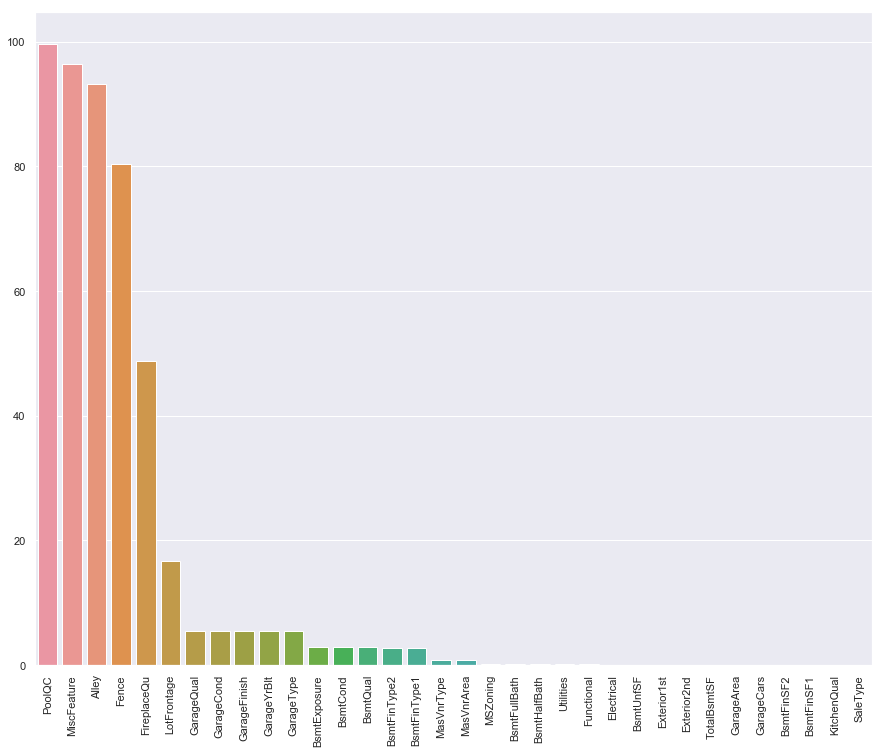

In [94]:
plt.subplots(figsize=(15,12))
plt.xticks(rotation=90)
sns.barplot(x=all_data_na.index,y=all_data_na)

In [95]:
corrmat=df.corr()

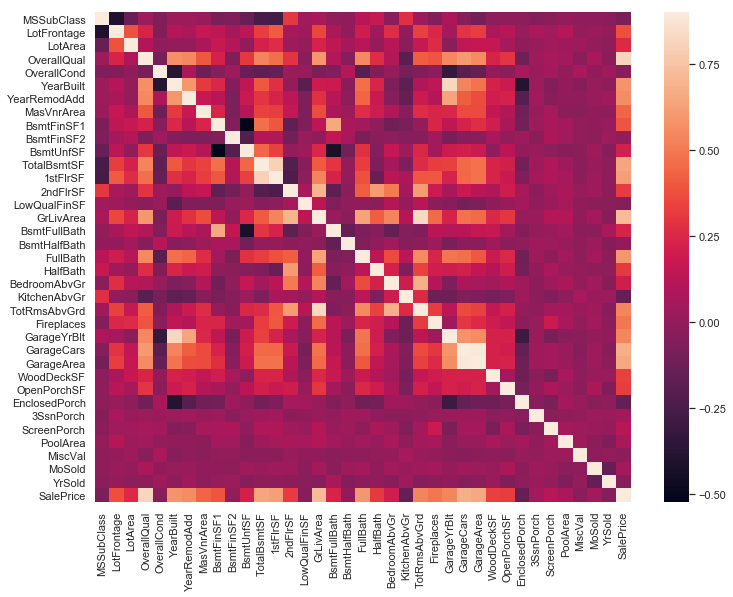

In [102]:
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,square=False,vmax=0.9)

In [104]:
all_data['PoolQC']=all_data['PoolQC'].fillna("None")

In [105]:
all_data['MiscFeature']=all_data['MiscFeature'].fillna("None")

In [106]:
all_data['Alley']=all_data['Alley'].fillna("None")

In [107]:
all_data['Fence']=all_data['Fence'].fillna("None")

In [108]:
all_data['FireplaceQu']=all_data['FireplaceQu'].fillna("None")

In [112]:
all_data['LotFrontage']=all_data.groupby('Neighborhood')['LotFrontage'].transform(lambda x:x.fillna(x.median()))

In [113]:
for cols in ('GarageCond','GarageFinish', 'GarageQual', 'GarageType'):
    all_data[cols]=all_data[cols].fillna('None')

In [114]:
for cols in('GarageArea', 'GarageCars','GarageYrBlt'):
    all_data[cols]=all_data[cols].fillna(0)

In [119]:
for cols in ('BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1','BsmtExposure'):
    all_data[cols]=all_data[cols].fillna('None')

In [120]:
for cols in ('BsmtFinSF1', 'BsmtFinSF2','BsmtFullBath', 'BsmtHalfBath','BsmtUnfSF','TotalBsmtSF'):
    all_data[cols]=all_data[cols].fillna(0)

In [121]:
all_data['MasVnrType']=all_data['MasVnrType'].fillna('None')
all_data['MasVnrArea']=all_data['MasVnrArea'].fillna(0)

In [123]:
all_data['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [124]:
all_data['MSZoning']=all_data['MSZoning'].fillna('RL')

In [125]:
all_data['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [126]:
all_data=all_data.drop(['Utilities'],axis=1)

In [128]:
all_data['Functional']=all_data['Functional'].fillna('Typ')

In [130]:
all_data['Electrical']=all_data['Electrical'].fillna('SBrkr')

In [133]:
all_data['Exterior1st']=all_data['Exterior1st'].fillna('VinylSd')

In [135]:
all_data['Exterior2nd']=all_data['Exterior2nd'].fillna('VinylSd')

In [139]:
all_data['KitchenQual']=all_data['KitchenQual'].fillna('TA')

In [142]:
all_data['SaleType']=all_data['SaleType'].fillna('WD')

In [144]:
all_data_na=all_data.isnull().sum()/len(all_data)*100
all_data_na=all_data_na.drop(all_data_na[all_data_na==0].index).sort_values(ascending=False)
all_data_na

Series([], dtype: float64)

In [145]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

In [147]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [148]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [149]:
all_data.shape

(2917, 78)

In [150]:
all_data['TotalSF']=all_data['TotalBsmtSF']+all_data['1stFlrSF']+all_data['2ndFlrSF']

In [152]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null int64
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null int64
BsmtExposure     2917 non-null int64
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null int64
BsmtFinType2     2917 non-null int64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null int64
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null int64
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null int64
ExterQual        2917 non-null int64
Exterior1st      2917 non-nu

In [153]:
numeric_feats=all_data.dtypes[all_data.dtypes!='object'].index
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF',
       'CentralAir', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Fireplaces', 'FullBath', 'Functional', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'HeatingQC', 'KitchenAbvGr', 'KitchenQual',
       'LandSlope', 'LotArea', 'LotFrontage', 'LotShape', 'LowQualFinSF',
       'MSSubClass', 'MasVnrArea', 'MiscVal', 'MoSold', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC',
       'ScreenPorch', 'Street', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold', 'TotalSF'],
      dtype='object')

In [156]:
skewed_feats=all_data[numeric_feats].apply(lambda x:skew(x.dropna())).sort_values(ascending=False)

In [158]:
skewness=pd.DataFrame({'Skew':skewed_feats})

In [160]:
print(skewness.shape)
skewness

(59, 1)


,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [161]:
skewness=skewness[abs(skewness)>0.75]
print(skewness.shape)

(59, 1)


In [163]:
from scipy.special import boxcox1p
skewed_features=skewness.index
lam=0.15
for feat in skewed_features:
    all_data[feat]=boxcox1p(all_data[feat],lam)

In [164]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 79 columns):
1stFlrSF         2917 non-null float64
2ndFlrSF         2917 non-null float64
3SsnPorch        2917 non-null float64
Alley            2917 non-null float64
BedroomAbvGr     2917 non-null float64
BldgType         2917 non-null object
BsmtCond         2917 non-null float64
BsmtExposure     2917 non-null float64
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null float64
BsmtFinType2     2917 non-null float64
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null float64
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null float64
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null float64
ExterCond        2917 non-null float64
ExterQual        2917 non-null float64


In [165]:
all_data=pd.get_dummies(all_data)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 220 entries, 1stFlrSF to SaleType_WD
dtypes: float64(59), uint8(161)
memory usage: 1.8 MB


In [166]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Columns: 220 entries, 1stFlrSF to SaleType_WD
dtypes: float64(59), uint8(161)
memory usage: 1.8 MB


In [167]:
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1


In [169]:
train=all_data[:n_train]
test=all_data[n_train:]

In [170]:
train.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.0,0.730463,1.540963,1.820334,1.540963,11.170327,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.0,0.730463,1.540963,1.820334,0.730463,12.062832,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.0,0.730463,1.540963,1.820334,1.194318,10.200343,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.0,0.730463,1.540963,0.730463,1.540963,8.274266,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.0,0.730463,1.820334,1.820334,0.000000,10.971129,0.0,1.194318,...,0,0,0,0,0,0,0,0,0,1


In [172]:
train.shape

(1458, 220)

In [173]:
test.shape

(1459, 220)

In [175]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [176]:
n_folds=5
def rmsle_cv(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse=np.sqrt(-cross_val_score(model,train.values,y_train,scoring="neg_mean_squared_error",cv=kf))
    return (rmse)


In [177]:
lasso=make_pipeline(RobustScaler(),Lasso(alpha=0.0005,random_state=1))

In [178]:
Enet=make_pipeline(RobustScaler(),ElasticNet(alpha=0.005,l1_ratio=0.9,random_state=3))

In [179]:
KRR=KernelRidge(alpha=0.6,kernel='polynomial',degree=2,coef0=2.5)

In [181]:
GBoost=GradientBoostingRegressor(loss='huber',n_estimators=3000,learning_rate=0.05,max_depth=4,max_features='sqrt',min_samples_leaf=15,
                                min_samples_split=10,random_state=5)

In [182]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [183]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [189]:
score=rmsle_cv(lasso)
print(score.mean())
print(score.std())

0.1115440156513821
0.007358128399940417


In [190]:
score=rmsle_cv(Enet)
print(score.mean())
print(score.std())

0.12397379501246489
0.007556901288179343


In [191]:
score=rmsle_cv(KRR)
print(score.mean())
print(score.std())

0.11525466421167589
0.007548245034320079


In [192]:
score=rmsle_cv(GBoost)
print(score.mean())
print(score.std())

0.11768195959825903
0.007998254192154641


In [193]:
score=rmsle_cv(model_xgb)
print(score.mean())
print(score.std())

0.11511009158779988
0.0069020621721555975


In [194]:
score=rmsle_cv(model_lgb)
print(score.mean())
print(score.std())

0.11618749898635419
0.007073212125351153


In [195]:
class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models=models;
    
    def fit(self,X,y):
        self.models_=[clone(x) for x in self.models]
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions=np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis=1)

In [197]:
avg_models=AveragingModels(models=(Enet,GBoost,KRR,lasso))
score=rmsle_cv(avg_models)
print(score.mean())
print(score.std())

0.11009077954204671
0.007519958007257114


In [198]:
avg_models=AveragingModels(models=(model_xgb,GBoost,KRR,lasso))
score=rmsle_cv(avg_models)
print(score.mean())
print(score.std())

0.10868661316764143
0.007059259343048645


In [199]:
avg_models=AveragingModels(models=(model_xgb,model_lgb,KRR,lasso))
score=rmsle_cv(avg_models)
print(score.mean())
print(score.std())

0.10891203110142608
0.006784300090827954


In [200]:
avg_models=AveragingModels(models=(Enet,GBoost,KRR,lasso,model_xgb,model_lgb))
score=rmsle_cv(avg_models)
print(score.mean())
print(score.std())

0.10937455768825981
0.007007098647124764


In [201]:
avg_models=AveragingModels(models=(GBoost,KRR,lasso,model_xgb,model_lgb))
score=rmsle_cv(avg_models)
print(score.mean())
print(score.std())

0.10901145496321293
0.007008787724570896


In [210]:
class StackingAverageModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,base_models,meta_model,n_folds=5):
        self.base_models=base_models
        self.meta_model=meta_model
        self.n_folds=n_folds
    
    def fit(self,X,y):
        self.base_models_=[list() for x in self.base_models]
        self.meta_model_=clone(self.meta_model)
        kfold=KFold(n_splits=self.n_folds,shuffle=True,random_state=156)
        
        out_of_fold_pred=np.zeros((X.shape[0],len(self.base_models)))
        for i,model in enumerate(self.base_models):
            for train_index,holdout_index in kfold.split(X,y):
                instance=clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index],y[train_index])
                out_of_fold_pred[holdout_index,i]=instance.predict(X[holdout_index])
        
        self.meta_model_.fit(out_of_fold_pred,y)
        return self
    
    def predict(self,X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [211]:
stacked_averaged_models = StackingAverageModels(base_models = (Enet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1099 (0.0070)


In [212]:
def rmsle(y,y_pred):
    return np.sqrt(mean_squared_error(y,y_pred))

In [214]:
stacked_averaged_models.fit(train.values,y_train)
stacked_train_pred=stacked_averaged_models.predict(train.values)
stacked_predict=np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y_train,stacked_train_pred))

0.07537338849436233


In [216]:
model_lgb.fit(train.values,y_train)
lgb_train_pred=model_lgb.predict(train.values)
lgb_predict=np.expm1(model_lgb.predict(test.values))
print(rmsle(y_train,lgb_train_pred))

0.07307464036005418


In [217]:
model_xgb.fit(train, y_train)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y_train, xgb_train_pred))

0.07879894799249872


In [218]:
print('RMSLE score on train data:')
print(rmsle(y_train,stacked_train_pred*0.70 +
               xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

RMSLE score on train data:
0.07346209782434841


In [220]:
ensemble = stacked_predict*0.70 + xgb_pred*0.15 + lgb_predict*0.15

In [221]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)